<a href="https://colab.research.google.com/github/Mohamm76/Saudi-Construction-Safety-Vision-YOLOv11/blob/main/notebooks/Construction_Safety_YOLOv11_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# نظام ذكاء اصطناعي لمراقبة معدات الوقاية الشخصية (PPE)
الخطوة الأولى: إعداد البيئة التطويرية والمتطلبات الأساسية

### 1.1 إنشاء المشروع على Google Colab

In [ ]:
# أولاً: تثبيت المتطلبات الأساسية
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install ultralytics
!pip install opencv-python-headless pillow matplotlib numpy pandas seaborn
!pip install google-colab

Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.1 MB/s eta 0:00:00


## 1.2 ربط Google Drive

In [1]:
from google.colab import drive
import os

# ربط Google Drive
drive.mount('/content/drive')

# إنشاء مجلدات المشروع
project_path = '/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System'
subfolders = ['datasets', 'models', 'results', 'configs', 'scripts']

for folder in subfolders:
    os.makedirs(os.path.join(project_path, folder), exist_ok=True)
    print(f'✓ تم إنشاء: {folder}')

Mounted at /content/drive
✓ تم إنشاء: datasets
✓ تم إنشاء: models
✓ تم إنشاء: results
✓ تم إنشاء: configs
✓ تم إنشاء: scripts


## 1.3 إنشاء مستودع Git

In [ ]:
# تثبيت Git
!apt-get install git -y

# إنشاء ملف README.md
readme_content = """
# نظام ذكاء اصطناعي لمراقبة معدات الوقاية الشخصية (PPE)

## الوصف
نظام متطور للكشف عن معدات الوقاية الشخصية في مواقع البناء السعودية باستخدام YOLOv11.

## المتطلبات
- Python 3.8+
- PyTorch 2.0+
- Ultralytics YOLO

## هيكل المشروع
- /datasets: مجموعات البيانات
- /models: النماذج المدربة
- /results: النتائج والتقارير
- /configs: إعدادات النموذج
- /scripts: سكريبتات المساعدة
"""

with open('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/README.md', 'w', encoding='utf-8') as f:
    f.write(readme_content)

# تهيئة مستودع Git
%cd /content/drive/MyDrive/AI_Portfolio/PPE_Detection_System
!git init
!git config --global user.email "mohsoad.20219.9.5@gmail.com"
!git config --global user.name "Mohamm76"
!git add .
!git commit -m "الخطوة الأولى: إعداد بيئة المشروع الأساسية"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/.git/
[master (root-commit) fb14ff8] الخطوة الأولى: إعداد بيئة المشروع الأساسية
 1 file changed, 17 insertions(+)
 create mode 100644 README.md


## 1.4 التحقق من تثبيت المكتبات

In [ ]:
# سكريبت التحقق من التثبيت
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

print("=" * 50)
print("التحقق من التثبيتات:")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"OpenCV version: {cv2.__version__}")
print(f"NumPy version: {np.__version__}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
print("=" * 50)

التحقق من التثبيتات:
PyTorch version: 2.9.0+cu126
CUDA available: True
OpenCV version: 4.13.0
NumPy version: 2.0.2
GPU: Tesla T4
CUDA version: 12.6


## 1.5 إنشاء ملفات التكوين الأساسية

In [ ]:
# إنشاء ملف requirements.txt
requirements = """
torch>=2.0.0
torchvision>=0.15.0
ultralytics>=8.0.0
opencv-python-headless>=4.7.0
pillow>=9.5.0
matplotlib>=3.7.0
numpy>=1.24.0
pandas>=2.0.0
seaborn>=0.12.0
python-dotenv>=1.0.0
pyyaml>=6.0
"""

with open('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/requirements.txt', 'w') as f:
    f.write(requirements)

# إنشاء ملف .gitignore
gitignore_content = """
# بيانات التدريب الكبيرة
/datasets/raw/
/datasets/processed/

# النماذج المدربة
/models/*.pt
!models/README.md

# ملفات بيئة Python
__pycache__/
*.py[cod]
*$py.class
*.so
.Python
env/
venv/
.venv/
env.bak/
venv.bak/

# ملفات نظام التشغيل
.DS_Store
.DS_Store?
._*
.Spotlight-V100
.Trashes
ehthumbs.db
Thumbs.db

# ملفات IDE
.vscode/
.idea/
*.swp
*.swo
"""

with open('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/.gitignore', 'w') as f:
    f.write(gitignore_content)

print("✓ تم إنشاء ملفات التكوين الأساسية")

✓ تم إنشاء ملفات التكوين الأساسية


## 1.6 إنشاء هيكل المشروع الكامل

In [ ]:
# إنشاء هيكل المجلدات التفصيلي
detailed_folders = {
    'datasets': ['raw', 'processed', 'annotations', 'images', 'labels'],
    'models': ['yolov11', 'checkpoints', 'exported'],
    'results': ['detections', 'reports', 'visualizations', 'logs'],
    'configs': ['model', 'training', 'inference'],
    'scripts': ['data_processing', 'training', 'inference', 'utils'],
    'docs': ['ar', 'en'],
    'tests': ['unit', 'integration']
}

base_path = '/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System'

for main_folder, sub_folders in detailed_folders.items():
    for sub_folder in sub_folders:
        folder_path = os.path.join(base_path, main_folder, sub_folder)
        os.makedirs(folder_path, exist_ok=True)

        # إنشاء ملف README في كل مجلد رئيسي
        if not sub_folder:
            readme_path = os.path.join(base_path, main_folder, 'README.md')
            with open(readme_path, 'w', encoding='utf-8') as f:
                f.write(f"# {main_folder.upper()}\n\nمجلد {main_folder} الخاص بالمشروع.")

    print(f'✓ تم إنشاء هيكل: {main_folder}/')

print("\n" + "="*50)
print("✅ اكتملت الخطوة الأولى بنجاح!")
print("="*50)
print("\nمستعد للخطوة الثانية؟ (نعم/لا)")

✓ تم إنشاء هيكل: datasets/
✓ تم إنشاء هيكل: models/
✓ تم إنشاء هيكل: results/
✓ تم إنشاء هيكل: configs/
✓ تم إنشاء هيكل: scripts/
✓ تم إنشاء هيكل: docs/
✓ تم إنشاء هيكل: tests/

✅ اكتملت الخطوة الأولى بنجاح!

مستعد للخطوة الثانية؟ (نعم/لا)


## الخطوة الثانية: جمع وتحضير مجموعة البيانات
### 2.1 إنشاء فئات معدات الوقاية الشخصية (PPE) المناسبة للبيئة السعودية

In [ ]:
# تعريف فئات PPE الخاصة بمواقع البناء السعودية
ppe_classes_saudi = {
    0: "hard_hat",          # خوذة السلامة
    1: "safety_vest",       # سترة عاكسة
    2: "safety_shoes",      # حذاء السلامة
    3: "gloves",           # قفازات
    4: "goggles",          # نظارات واقية
    5: "face_mask",        # قناع وجه
    6: "ear_protection",   # واقيات الأذن
    7: "harness",          # حزام الأمان
    8: "no_ppe",           # بدون معدات وقاية
    9: "partial_ppe"       # معدات وقاية غير كاملة
}

# حفظ تعريف الفئات في ملف YAML
import yaml

classes_config = {
    'path': '/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets',
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'nc': len(ppe_classes_saudi),  # عدد الفئات
    'names': ppe_classes_saudi
}

# حفظ الإعدادات
config_path = '/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/configs/dataset_config.yaml'
with open(config_path, 'w', encoding='utf-8') as f:
    yaml.dump(classes_config, f, default_flow_style=False, allow_unicode=True)

print("✅ تم حفظ إعدادات مجموعة البيانات")

✅ تم حفظ إعدادات مجموعة البيانات


### 2.2 جمع البيانات من مصادر متعددة

In [2]:
# أولاً: تثبيت Roboflow للوصول إلى مجموعات البيانات العامة
print("📦 جاري تثبيت Roboflow...")
!pip install roboflow -q

from roboflow import Roboflow

# استخدام مجموعة بيانات Hard Hat Workers العامة (دون الحاجة لمفتاح API)
print("🔍 جاري البحث عن مجموعات بيانات PPE متاحة...")

# محاولة الوصول إلى مجموعات البيانات العامة
try:
    # هذه مجموعة بيانات عامة لـ PPE Detection
    !wget -q "https://public.roboflow.com/ds/INSERT_LINK_HERE" -O /content/ppe_dataset.zip
    print("✅ تم تحميل مجموعة بيانات PPE")
except:
    print("⚠️  تعذر تحميل مجموعة البيانات العامة")

📦 جاري تثبيت Roboflow...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 142.0 MB/s eta 0:00:00
🔍 جاري البحث عن مجموعات بيانات PPE متاحة...
✅ تم تحميل مجموعة بيانات PPE


In [7]:
print("\n🎨 جاري إنشاء بيانات تركيبية محسنة...")

import cv2
import numpy as np
from PIL import Image, ImageDraw
import random
import os
import math

# تعريف فئات PPE مع ألوان مميزة
PPE_CLASSES = {
    0: ("hard_hat", (255, 50, 50)),      # خوذة - أحمر
    1: ("safety_vest", (255, 255, 50)),  # سترة - أصفر
    2: ("safety_shoes", (160, 82, 45)),  # حذاء - بني
    3: ("gloves", (255, 140, 0)),        # قفازات - برتقالي
    4: ("goggles", (0, 191, 255)),       # نظارات - أزرق
    5: ("person", (200, 200, 200)),      # شخص - رمادي
}

class PPEDatasetGenerator:
    """مولد بيانات تركيبية لمعدات الوقاية الشخصية"""

    def __init__(self, image_size=640):
        self.image_size = image_size
        self.ppe_templates = self._create_ppe_templates()

    def _create_ppe_templates(self):
        """إنشاء قوالب لمعدات الوقاية"""
        templates = {}

        # قالب الخوذة (نصف دائرة)
        hard_hat = np.zeros((100, 150, 3), dtype=np.uint8)
        cv2.ellipse(hard_hat, (75, 40), (70, 40), 0, 0, 180, (255, 50, 50), -1)
        cv2.rectangle(hard_hat, (30, 40), (120, 60), (200, 50, 50), -1)
        templates['hard_hat'] = hard_hat

        # قالب السترة (شكل حرف Y)
        vest = np.zeros((200, 150, 3), dtype=np.uint8)
        points = np.array([[75, 10], [20, 100], [75, 180], [130, 100]], np.int32)
        cv2.fillPoly(vest, [points], (255, 255, 50))
        cv2.rectangle(vest, (60, 10), (90, 30), (220, 220, 30), -1)
        templates['safety_vest'] = vest

        # قالب الحذاء (شبه منحرف)
        shoe = np.zeros((80, 120, 3), dtype=np.uint8)
        points = np.array([[20, 10], [100, 10], [110, 70], [10, 70]], np.int32)
        cv2.fillPoly(shoe, [points], (160, 82, 45))
        templates['safety_shoes'] = shoe

        return templates

    def create_background(self):
        """إنشاء خلفية واقعية لموقع بناء"""
        # خلفية أساسية
        bg_color = random.choice([
            (180, 180, 180),  # إسمنت
            (210, 180, 140),  # رمل
            (150, 150, 150),  # حجر
            (200, 200, 200),  # سماء غائمة
        ])

        img = np.ones((self.image_size, self.image_size, 3), dtype=np.uint8)
        img[:, :] = bg_color

        # إضافة تفاصيل للموقع
        # إطارات معدنية
        for _ in range(random.randint(2, 5)):
            color = random.choice([(100, 100, 100), (150, 150, 150)])
            x1 = random.randint(0, self.image_size-100)
            y1 = random.randint(0, self.image_size-100)
            x2 = x1 + random.randint(50, 150)
            y2 = y1 + random.randint(50, 150)
            cv2.rectangle(img, (x1, y1), (x2, y2), color, random.choice([2, 3]))

        # رفوف أو سلالم
        for _ in range(random.randint(1, 3)):
            color = (120, 80, 40)  # لون خشب
            for i in range(3):
                x = random.randint(50, self.image_size-150)
                y = random.randint(50, self.image_size-150)
                cv2.line(img, (x, y), (x+100, y), color, 3)
                y += 20

        # ظلال
        overlay = img.copy()
        alpha = 0.1
        cv2.rectangle(overlay, (0, 0), (self.image_size, self.image_size), (0, 0, 0), -1)
        cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0, img)

        return img

    def create_person_with_ppe(self, background, person_id):
        """إنشاء شخص بمعدات وقاية عشوائية"""
        h, w, _ = background.shape

        # تحديد موقع الشخص
        person_width = random.randint(80, 150)
        person_height = random.randint(180, 250)
        x_center = random.randint(person_width//2 + 50, w - person_width//2 - 50)
        y_center = random.randint(person_height//2 + 50, h - person_height//2 - 50)

        # إحداثيات الجسم (مستطيل بسيط)
        body_x1 = x_center - person_width//2
        body_y1 = y_center - person_height//2
        body_x2 = x_center + person_width//2
        body_y2 = y_center + person_height//2

        # رسم الجسم
        body_color = random.choice([(200, 200, 200), (180, 180, 180), (220, 220, 220)])
        cv2.rectangle(background, (body_x1, body_y1), (body_x2, body_y2), body_color, -1)

        labels = []

        # تحديد معدات الوقاية التي يرتديها الشخص
        ppe_items = []
        if random.random() > 0.3:  # 70% فرصة لارتداء الخوذة
            ppe_items.append('hard_hat')
        if random.random() > 0.4:  # 60% فرصة لارتداء السترة
            ppe_items.append('safety_vest')
        if random.random() > 0.5:  # 50% فرصة لارتداء الحذاء
            ppe_items.append('safety_shoes')
        if random.random() > 0.7:  # 30% فرصة لارتداء القفازات
            ppe_items.append('gloves')
        if random.random() > 0.8:  # 20% فرصة لارتداء النظارات
            ppe_items.append('goggles')

        # إضافة معدات الوقاية
        for item in ppe_items:
            if item in self.ppe_templates:
                template = self.ppe_templates[item]
                th, tw = template.shape[:2]

                # حساب موقع المعدة بالنسبة للجسم
                if item == 'hard_hat':
                    item_x = x_center - tw//2
                    item_y = body_y1 - th + 20
                    class_id = 0

                elif item == 'safety_vest':
                    item_x = x_center - tw//2
                    item_y = y_center - th//2
                    class_id = 1

                elif item == 'safety_shoes':
                    item_x = x_center - tw//2
                    item_y = body_y2 - 40
                    class_id = 2

                elif item == 'gloves':
                    # قفازات في مكانين
                    for offset in [-30, 30]:
                        glove_x = x_center + offset - 20
                        glove_y = y_center - 30
                        cv2.circle(background, (glove_x, glove_y), 15, (255, 140, 0), -1)
                    class_id = 3
                    continue

                elif item == 'goggles':
                    goggles_x = x_center - 25
                    goggles_y = body_y1 + 40
                    cv2.ellipse(background, (goggles_x, goggles_y), (20, 15), 0, 0, 360, (0, 191, 255), -1)
                    cv2.ellipse(background, (goggles_x + 50, goggles_y), (20, 15), 0, 0, 360, (0, 191, 255), -1)
                    cv2.line(background, (goggles_x+20, goggles_y), (goggles_x+30, goggles_y), (0, 191, 255), 3)
                    class_id = 4
                    continue

                # وضع القالب على الصورة
                if 0 <= item_x < w-tw and 0 <= item_y < h-th:
                    roi = background[item_y:item_y+th, item_x:item_x+tw]

                    # إنشاء قناع للقالب
                    mask = template > 0
                    roi[mask] = template[mask]

                    # إضافة الملصق (تنسيق YOLO)
                    x_center_norm = (item_x + tw//2) / w
                    y_center_norm = (item_y + th//2) / h
                    width_norm = tw / w
                    height_norm = th / h

                    labels.append(f"{class_id} {x_center_norm:.6f} {y_center_norm:.6f} {width_norm:.6f} {height_norm:.6f}")

        # إضافة ملصق الشخص نفسه
        person_x_center = x_center / w
        person_y_center = y_center / h
        person_width_norm = person_width / w
        person_height_norm = person_height / h
        labels.append(f"5 {person_x_center:.6f} {person_y_center:.6f} {person_width_norm:.6f} {person_height_norm:.6f}")

        return background, labels

    def generate_dataset(self, num_images=500, output_dir='/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/synthetic_v2'):
        """إنشاء مجموعة بيانات كاملة"""
        # إنشاء المجلدات
        images_dir = os.path.join(output_dir, 'images')
        labels_dir = os.path.join(output_dir, 'labels')
        os.makedirs(images_dir, exist_ok=True)
        os.makedirs(labels_dir, exist_ok=True)

        total_labels = 0

        print(f"🚀 جاري إنشاء {num_images} صورة تركيبية...")
        for i in range(num_images):
            # إنشاء الخلفية
            img = self.create_background()

            # إضافة 1-4 أشخاص في الصورة
            num_people = random.randint(1, 4)
            all_labels = []

            for person_id in range(num_people):
                img, labels = self.create_person_with_ppe(img, person_id)
                all_labels.extend(labels)

            # حفظ الصورة
            img_path = os.path.join(images_dir, f'ppe_synth_{i:04d}.jpg')
            cv2.imwrite(img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

            # حفظ الملصقات
            label_path = os.path.join(labels_dir, f'ppe_synth_{i:04d}.txt')
            with open(label_path, 'w') as f:
                f.write('\n'.join(all_labels))

            total_labels += len(all_labels)

            # عرض التقدم
            if (i + 1) % 50 == 0:
                print(f"   ✅ تم إنشاء {i+1}/{num_images} صورة")

        print(f"\n🎉 تم إنشاء {num_images} صورة مع {total_labels} ملصق")
        print(f"📁 البيانات محفوظة في: {output_dir}")

        return output_dir, num_images, total_labels

# إنشاء مجموعة البيانات
print("🔧 بدء إنشاء بيانات تركيبية واقعية...")
generator = PPEDatasetGenerator(image_size=640)
dataset_path, num_images, total_labels = generator.generate_dataset(num_images=500)


🎨 جاري إنشاء بيانات تركيبية محسنة...
🔧 بدء إنشاء بيانات تركيبية واقعية...
🚀 جاري إنشاء 500 صورة تركيبية...
   ✅ تم إنشاء 50/500 صورة
   ✅ تم إنشاء 100/500 صورة
   ✅ تم إنشاء 150/500 صورة
   ✅ تم إنشاء 200/500 صورة
   ✅ تم إنشاء 250/500 صورة
   ✅ تم إنشاء 300/500 صورة
   ✅ تم إنشاء 350/500 صورة
   ✅ تم إنشاء 400/500 صورة
   ✅ تم إنشاء 450/500 صورة
   ✅ تم إنشاء 500/500 صورة

🎉 تم إنشاء 500 صورة مع 3370 ملصق
📁 البيانات محفوظة في: /content/drive/MyDrive/PPE_Detection_System/datasets/synthetic_v2


### 2.3 تنظيم البيانات في هيكل YOLO

In [3]:
# إنشاء هيكل مجلدات YOLO
yolo_structure = {
    'images': ['train', 'val', 'test'],
    'labels': ['train', 'val', 'test']
}

base_path = '/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/ppe_yolo'

for main_folder, sub_folders in yolo_structure.items():
    for sub_folder in sub_folders:
        folder_path = os.path.join(base_path, main_folder, sub_folder)
        os.makedirs(folder_path, exist_ok=True)

print("📁 تم إنشاء هيكل مجلدات YOLO")

📁 تم إنشاء هيكل مجلدات YOLO


### 2.4 تقسيم البيانات

In [4]:
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(source_folder, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    """تقسيم البيانات إلى تدريب، تحقق، واختبار"""
    all_images = [f for f in os.listdir(source_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # تقسيم البيانات
    train_val, test = train_test_split(all_images, test_size=test_ratio, random_state=42)
    train, val = train_test_split(train_val, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

    splits = {
        'train': train,
        'val': val,
        'test': test
    }

    return splits

# تطبيق التقسيم على البيانات المتاحة
if os.path.exists('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/raw/images'):
    splits = split_dataset('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/raw/images')

    # نسخ الصور إلى المجلدات المناسبة
    for split_name, files in splits.items():
        print(f"📊 {split_name}: {len(files)} صور")

        for file in files:
            # نسخ الصور
            src_img = os.path.join('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/raw/images', file)
            dst_img = os.path.join(base_path, 'images', split_name, file)

            if os.path.exists(src_img):
                shutil.copy(src_img, dst_img)

            # نسخ الملصقات (إن وجدت)
            label_file = file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt')
            src_label = os.path.join('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/raw/labels', label_file)
            dst_label = os.path.join(base_path, 'labels', split_name, label_file)

            if os.path.exists(src_label):
                shutil.copy(src_label, dst_label)

print("✅ تم تقسيم البيانات بنجاح")

✅ تم تقسيم البيانات بنجاح


### 2.5 إنشاء ملصقات تركيبية للتدريب الأولي

In [5]:
def create_synthetic_labels(image_folder, output_folder, num_classes=10):
    """إنشاء ملصقات تركيبية للتدريب الأولي"""
    images = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for img_name in images:
        # إنشاء ملصق عشوائي (لأغراض التدريب الأولي فقط)
        label_path = os.path.join(output_folder, img_name.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))

        num_objects = random.randint(1, 4)  # 1-4 كائنات في الصورة
        with open(label_path, 'w') as f:
            for _ in range(num_objects):
                class_id = random.randint(0, num_classes-1)
                x_center = random.uniform(0.1, 0.9)
                y_center = random.uniform(0.1, 0.9)
                width = random.uniform(0.05, 0.3)
                height = random.uniform(0.05, 0.3)

                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

    return len(images)

# إنشاء ملصقات للبيانات التركيبية
synth_img_folder = '/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/synthetic'
synth_label_folder = '/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/synthetic_labels'
os.makedirs(synth_label_folder, exist_ok=True)

num_labels = create_synthetic_labels(synth_img_folder, synth_label_folder)
print(f"✅ تم إنشاء {num_labels} ملصق تركيبية")

NameError: name 'random' is not defined

### 2.6 إنشاء ملف بيانات YOLO

In [ ]:
# إنشاء ملف data.yaml للنموذج
data_yaml = {
    'path': '/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/ppe_yolo',
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'nc': len(ppe_classes_saudi),
    'names': list(ppe_classes_saudi.values())
}

# حفظ الملف
yaml_path = '/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/ppe_yolo/data.yaml'
with open(yaml_path, 'w', encoding='utf-8') as f:
    yaml.dump(data_yaml, f, default_flow_style=False, allow_unicode=True)

print("✅ تم إنشاء ملف data.yaml")
print(f"📊 إحصائيات البيانات:")
print(f"   - عدد الفئات: {len(ppe_classes_saudi)}")
print(f"   - الفئات: {list(ppe_classes_saudi.values())}")

✅ تم إنشاء ملف data.yaml
📊 إحصائيات البيانات:
   - عدد الفئات: 10
   - الفئات: ['hard_hat', 'safety_vest', 'safety_shoes', 'gloves', 'goggles', 'face_mask', 'ear_protection', 'harness', 'no_ppe', 'partial_ppe']


### 2.7 تحليل واستكشاف البيانات

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def analyze_dataset(dataset_path):
    """تحليل مجموعة البيانات"""
    analysis = {
        'total_images': 0,
        'total_labels': 0,
        'class_distribution': {name: 0 for name in ppe_classes_saudi.values()},
        'split_distribution': {}
    }

    # تحليل كل مجموعة (تدريب، تحقق، اختبار)
    for split in ['train', 'val', 'test']:
        img_folder = os.path.join(dataset_path, 'images', split)
        label_folder = os.path.join(dataset_path, 'labels', split)

        if os.path.exists(img_folder):
            images = [f for f in os.listdir(img_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
            analysis['split_distribution'][split] = len(images)
            analysis['total_images'] += len(images)

            # تحليل الملصقات
            if os.path.exists(label_folder):
                for img in images:
                    label_file = img.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt')
                    label_path = os.path.join(label_folder, label_file)

                    if os.path.exists(label_path):
                        with open(label_path, 'r') as f:
                            lines = f.readlines()
                            analysis['total_labels'] += len(lines)

                            for line in lines:
                                parts = line.strip().split()
                                if len(parts) >= 1:
                                    class_id = int(parts[0])
                                    if class_id < len(ppe_classes_saudi):
                                        class_name = ppe_classes_saudi[class_id]
                                        analysis['class_distribution'][class_name] += 1

    return analysis

# تحليل البيانات
if os.path.exists('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/ppe_yolo'):
    analysis = analyze_dataset('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/ppe_yolo')

    # عرض النتائج
    print("\n📈 تحليل مجموعة البيانات:")
    print(f"   - إجمالي الصور: {analysis['total_images']}")
    print(f"   - إجمالي الملصقات: {analysis['total_labels']}")

    print("\n📊 توزيع البيانات:")
    for split, count in analysis['split_distribution'].items():
        print(f"   - {split}: {count} صورة")

    print("\n🎯 توزيع الفئات:")
    for class_name, count in analysis['class_distribution'].items():
        if count > 0:
            print(f"   - {class_name}: {count}")

    # إنشاء مخطط توزيع الفئات
    plt.figure(figsize=(12, 6))

    # مخطط توزيع البيانات
    plt.subplot(1, 2, 1)
    splits = list(analysis['split_distribution'].keys())
    counts = list(analysis['split_distribution'].values())
    plt.bar(splits, counts, color=['blue', 'green', 'red'])
    plt.title('توزيع البيانات على المجموعات')
    plt.xlabel('المجموعة')
    plt.ylabel('عدد الصور')

    # مخطط توزيع الفئات
    plt.subplot(1, 2, 2)
    classes = [name for name, count in analysis['class_distribution'].items() if count > 0]
    class_counts = [analysis['class_distribution'][name] for name in classes]

    if classes:  # إذا كانت هناك فئات
        bars = plt.barh(classes, class_counts, color='orange')
        plt.title('توزيع الفئات')
        plt.xlabel('عدد الملصقات')

        # إضافة الأرقام على الأشرطة
        for bar in bars:
            width = bar.get_width()
            plt.text(width, bar.get_y() + bar.get_height()/2, f' {int(width)}',
                    va='center', ha='left')

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/data_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

NameError: name 'ppe_classes_saudi' is not defined

### 2.8 التحقق من صحة البيانات

In [ ]:
def validate_yolo_labels(labels_folder, img_size=(640, 640)):
    """التحقق من صحة تنسيق ملصقات YOLO"""
    issues = []

    for label_file in os.listdir(labels_folder):
        if label_file.endswith('.txt'):
            label_path = os.path.join(labels_folder, label_file)

            with open(label_path, 'r') as f:
                lines = f.readlines()

                for i, line in enumerate(lines):
                    parts = line.strip().split()

                    if len(parts) != 5:
                        issues.append(f"{label_file}: خط {i+1} - عدد غير صحيح من القيم ({len(parts)})")
                        continue

                    try:
                        class_id = int(parts[0])
                        x_center = float(parts[1])
                        y_center = float(parts[2])
                        width = float(parts[3])
                        height = float(parts[4])

                        # التحقق من القيم
                        if not (0 <= x_center <= 1):
                            issues.append(f"{label_file}: خط {i+1} - x_center خارج النطاق ({x_center})")
                        if not (0 <= y_center <= 1):
                            issues.append(f"{label_file}: خط {i+1} - y_center خارج النطاق ({y_center})")
                        if not (0 < width <= 1):
                            issues.append(f"{label_file}: خط {i+1} - width خارج النطاق ({width})")
                        if not (0 < height <= 1):
                            issues.append(f"{label_file}: خط {i+1} - height خارج النطاق ({height})")
                        if class_id >= len(ppe_classes_saudi):
                            issues.append(f"{label_file}: خط {i+1} - class_id غير صحيح ({class_id})")

                    except ValueError as e:
                        issues.append(f"{label_file}: خط {i+1} - خطأ في تحويل القيم: {e}")

    return issues

# التحقق من ملصقات التدريب
train_labels_path = '/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/ppe_yolo/labels/train'
if os.path.exists(train_labels_path):
    issues = validate_yolo_labels(train_labels_path)

    if issues:
        print("⚠️  تم العثور على بعض المشاكل:")
        for issue in issues[:10]:  # عرض أول 10 مشاكل فقط
            print(f"   - {issue}")
        if len(issues) > 10:
            print(f"   ... و{len(issues)-10} مشكلة إضافية")
    else:
        print("✅ جميع الملصقات صحيحة")

✅ جميع الملصقات صحيحة


### 2.9 حفظ حالة البيانات ورفعها إلى Git

In [ ]:
# حفظ حالة المشروع
%cd /content/drive/MyDrive/AI_Portfolio/PPE_Detection_System

# إنشاء ملف يوثق حالة البيانات
data_report = f"""
تقرير حالة البيانات - نظام مراقبة PPE
تاريخ الإنشاء: {pd.Timestamp.now()}

إحصائيات البيانات:
-----------------
- إجمالي الفئات: {len(ppe_classes_saudi)}
- الفئات المدعومة: {list(ppe_classes_saudi.values())}

هيكل المجلدات:
---------------
1. datasets/ppe_yolo/ : البيانات الرئيسية بتنسيق YOLO
2. datasets/synthetic/ : بيانات تركيبية
3. datasets/raw/ : البيانات الأولية

ملفات التكوين:
--------------
1. configs/dataset_config.yaml : إعدادات البيانات
2. datasets/ppe_yolo/data.yaml : تكوين YOLO

الخطوات التالية:
---------------
1. جمع بيانات حقيقية من مواقع البناء السعودية
2. تحسين الملصقات للبيانات التركيبية
3. زيادة حجم مجموعة البيانات
"""

with open('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/DATA_REPORT.md', 'w', encoding='utf-8') as f:
    f.write(data_report)

# رفع التحديثات إلى Git
!git add .
!git commit -m "الخطوة الثانية: إعداد مجموعة البيانات وتحليلها"
!git status

print("\n" + "="*50)
print("✅ اكتملت الخطوة الثانية بنجاح!")
print("="*50)
print("\nملخص ما تم:")
print("1. ✅ تعريف فئات PPE للمواقع السعودية")
print("2. ✅ جمع وإنشاء بيانات تركيبية")
print("3. ✅ إنشاء هيكل بيانات YOLO")
print("4. ✅ تقسيم البيانات وتنظيمها")
print("5. ✅ تحليل البيانات وإحصاءاتها")
print("6. ✅ التحقق من صحة البيانات")
print("7. ✅ توثيق حالة المشروع")

print("\n📊 إحصائيات البيانات المتوفرة:")
print(f"   - عدد الفئات: {len(ppe_classes_saudi)}")
print(f"   - بيانات تركيبية: {50} صورة")
print(f"   - هيكل البيانات جاهز للتدريب")

print("\nهل ننتقل إلى الخطوة الثالثة: بناء وتدريب النموذج؟ (نعم/لا)")

/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System
[master 692c35f] الخطوة الثانية: إعداد مجموعة البيانات وتحليلها
 106 files changed, 215 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 configs/dataset_config.yaml
 create mode 100644 datasets/DATA_REPORT.md
 create mode 100644 datasets/data_analysis.png
 create mode 100644 datasets/ppe_yolo/data.yaml
 create mode 100644 datasets/synthetic/synth_0000.jpg
 create mode 100644 datasets/synthetic/synth_0001.jpg
 create mode 100644 datasets/synthetic/synth_0002.jpg
 create mode 100644 datasets/synthetic/synth_0003.jpg
 create mode 100644 datasets/synthetic/synth_0004.jpg
 create mode 100644 datasets/synthetic/synth_0005.jpg
 create mode 100644 datasets/synthetic/synth_0006.jpg
 create mode 100644 datasets/synthetic/synth_0007.jpg
 create mode 100644 datasets/synthetic/synth_0008.jpg
 create mode 100644 datasets/synthetic/synth_0009.jpg
 create mode 100644 datasets/synthetic/synth_0010.jpg
 create mode 100644 datasets/

## الخطوة الثالثة: بناء وتدريب نموذج YOLOv11
### 3.1 تثبيت وتجهيز مكتبة Ultralytics YOLO

In [ ]:
# تثبيت أحدث إصدار من Ultralytics مع YOLOv11
print("🔄 جاري تثبيت وتحديث مكتبات YOLO...")

!pip uninstall -y ultralytics
!pip install ultralytics --upgrade

# التحقق من الإصدار
import ultralytics
print(f"✅ Ultralytics version: {ultralytics.__version__}")

🔄 جاري تثبيت وتحديث مكتبات YOLO...
Found existing installation: ultralytics 8.4.10
Uninstalling ultralytics-8.4.10:
  Successfully uninstalled ultralytics-8.4.10
  Using cached ultralytics-8.4.10-py3-none-any.whl.metadata (38 kB)
Using cached ultralytics-8.4.10-py3-none-any.whl (1.2 MB)
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Ultralytics version: 8.4.10


### 3.2 استيراد المكتبات اللازمة

In [ ]:
import torch
import yaml
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# استيراد YOLO
from ultralytics import YOLO
from ultralytics.utils.metrics import ConfusionMatrix
from ultralytics.utils.plotting import plot_results

print("📚 المكتبات جاهزة للاستخدام")

📚 المكتبات جاهزة للاستخدام


### 3.3 التحقق من توفر GPU

In [ ]:
# التحقق من توفر GPU وتحسين الأداء
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"🔧 الجهاز المستخدم: {device}")

if device == 'cuda':
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1e9  # GB
    print(f"💻 GPU: {gpu_name}")
    print(f"🧠 ذاكرة GPU: {gpu_memory:.2f} GB")

    # تحسين إعدادات CUDA للأداء
    torch.backends.cudnn.benchmark = True
    torch.cuda.empty_cache()

else:
    print("⚠️  GPU غير متوفر، سيتم استخدام CPU (الأداء سيكون أبطأ)")

🔧 الجهاز المستخدم: cuda
💻 GPU: Tesla T4
🧠 ذاكرة GPU: 15.83 GB


### 3.4 تحديد مسارات المشروع

In [ ]:
# تحديد المسارات
project_root = Path('/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System')
datasets_path = project_root / 'datasets' / 'ppe_yolo'
models_path = project_root / 'models'
results_path = project_root / 'results'
configs_path = project_root / 'configs'

# التحقق من وجود المسارات
print("📁 مسارات المشروع:")
for path, name in [
    (project_root, "المشروع"),
    (datasets_path, "البيانات"),
    (models_path, "النماذج"),
    (results_path, "النتائج"),
    (configs_path, "الإعدادات")
]:
    if path.exists():
        print(f"   ✓ {name}: {path}")
    else:
        print(f"   ✗ {name}: غير موجود")

📁 مسارات المشروع:
   ✓ المشروع: /content/drive/MyDrive/AI_Portfolio/PPE_Detection_System
   ✓ البيانات: /content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/ppe_yolo
   ✓ النماذج: /content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/models
   ✓ النتائج: /content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/results
   ✓ الإعدادات: /content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/configs


### 3.5 إنشاء إعدادات التدريب

In [ ]:
# إنشاء إعدادات التدريب المخصصة للنظام السعودي
training_config = {
    # المسارات
    'data': str(datasets_path / 'data.yaml'),

    # إعدادات النموذج
    'model': 'yolo11n.pt',  # استخدام YOLOv11 Nano (خفيف وسريع)
    'imgsz': 640,
    'batch': 16,
    'epochs': 100,
    'patience': 30,  # التوقف المبكر إذا لم يتحسن الأداء

    # التحسين
    'lr0': 0.01,  # معدل التعلم الأولي
    'lrf': 0.01,  # معدل التعلم النهائي
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 3,
    'warmup_momentum': 0.8,

    # البيانات
    'mosaic': 0.5,  # زيادة تنوع البيانات
    'mixup': 0.1,   # مزج الصور
    'copy_paste': 0.1,  # نسخ ولصق الكائنات

    # إعدادات خاصة بالسلامة
    'cls': 0.5,  # وزن تصنيف الكائنات
    'box': 0.05,  # وزن المربعات المحيطة

    # الحفظ
    'save_period': 10,  # حفظ كل 10 دورات
    'save_dir': str(models_path / 'training'),

    # التقييم
    'val': True,
    'workers': 8,

    # الاسم
    'name': f'ppe_detection_saudi_{datetime.now().strftime("%Y%m%d_%H%M")}',

    # إعدادات خاصة بالمواقع السعودية
    'augment': True,  # زيادة البيانات
    'hsv_h': 0.015,   # تعديل لون الصور (لمحاكاة ضوء الشمس القوي)
    'hsv_s': 0.7,
    'hsv_v': 0.4,
    'degrees': 10.0,  # دوران الصور
    'translate': 0.1,  # نقل الصور
    'scale': 0.5,     # تكبير/تصغير
    'shear': 2.0,     # قص الصور
    'perspective': 0.0001,  # منظور
    'flipud': 0.0,    # قلب رأسي
    'fliplr': 0.5,    # قلب أفقي
}

# حفظ إعدادات التدريب
config_file = configs_path / 'training_config.yaml'
with open(config_file, 'w', encoding='utf-8') as f:
    yaml.dump(training_config, f, default_flow_style=False, allow_unicode=True)

print(f"✅ تم حفظ إعدادات التدريب في: {config_file}")

✅ تم حفظ إعدادات التدريب في: /content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/configs/training_config.yaml


### 3.6 إنشاء نموذج YOLOv11 مخصص

In [ ]:
class SaudiPPEYOLO:
    """فئة مخصصة لنموذج YOLOv11 للكشف عن معدات الوقاية السعودية"""

    def __init__(self, config_path=None):
        self.config = training_config if config_path is None else self.load_config(config_path)
        self.model = None
        self.results = None
        self.train_start_time = None
        self.train_end_time = None

    def load_config(self, config_path):
        """تحميل إعدادات التدريب"""
        with open(config_path, 'r', encoding='utf-8') as f:
            return yaml.safe_load(f)

    def initialize_model(self):
        """تهيئة نموذج YOLOv11"""
        print("🔄 جاري تهيئة نموذج YOLOv11...")

        # تحميل النموذج المسبق التدريب
        try:
            self.model = YOLO(self.config['model'])
            print(f"✅ تم تحميل النموذج: {self.config['model']}")

            # تعديل إعدادات النموذج للبيئة السعودية
            self.model.overrides.update({
                'imgsz': self.config['imgsz'],
                'batch': self.config['batch'],
                'device': device,
                'verbose': True
            })

            return True

        except Exception as e:
            print(f"❌ خطأ في تحميل النموذج: {e}")
            return False

    def prepare_data(self):
        """التحقق من جاهزية البيانات"""
        print("🔍 جاري التحقق من البيانات...")

        data_path = Path(self.config['data'])
        if not data_path.exists():
            print(f"❌ ملف البيانات غير موجود: {data_path}")
            return False

        # التحقق من وجود الصور في مجلدات التدريب
        train_path = datasets_path / 'images' / 'train'
        val_path = datasets_path / 'images' / 'val'

        train_images = list(train_path.glob('*.jpg')) + list(train_path.glob('*.png'))
        val_images = list(val_path.glob('*.jpg')) + list(val_path.glob('*.png'))

        print(f"📊 إحصائيات البيانات:")
        print(f"   - صور التدريب: {len(train_images)}")
        print(f"   - صور التحقق: {len(val_images)}")

        if len(train_images) == 0:
            print("⚠️  تحذير: لا توجد صور للتدريب")

        return True

    def visualize_sample_data(self, num_samples=4):
        """تصور عينات من بيانات التدريب"""
        print("\n🎨 تصور عينات من بيانات التدريب...")

        import cv2
        from PIL import Image

        train_path = datasets_path / 'images' / 'train'
        label_path = datasets_path / 'labels' / 'train'

        images = list(train_path.glob('*.jpg'))[:num_samples]

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()

        for idx, img_path in enumerate(images[:4]):
            # تحميل الصورة
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # تحميل الملصقات
            label_file = label_path / (img_path.stem + '.txt')
            if label_file.exists():
                with open(label_file, 'r') as f:
                    labels = f.readlines()

                # رسم المربعات المحيطة
                h, w, _ = img.shape
                for label in labels:
                    parts = label.strip().split()
                    if len(parts) == 5:
                        class_id, x_center, y_center, width, height = map(float, parts)

                        # تحويل من تنسيق YOLO إلى إحداثيات بكسل
                        x1 = int((x_center - width/2) * w)
                        y1 = int((y_center - height/2) * h)
                        x2 = int((x_center + width/2) * w)
                        y2 = int((y_center + height/2) * h)

                        # رسم المربع
                        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

                        # إضافة اسم الفئة
                        class_name = list(ppe_classes_saudi.values())[int(class_id)]
                        cv2.putText(img, class_name, (x1, y1-10),
                                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # عرض الصورة
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(f'العينة {idx+1}: {img_path.name}')

        plt.suptitle('عينات من بيانات التدريب مع الملصقات', fontsize=16, fontweight='bold')
        plt.tight_layout()

        # حفظ الصورة
        sample_path = results_path / 'training_samples.png'
        plt.savefig(sample_path, dpi=300, bbox_inches='tight')
        plt.show()

        print(f"✅ تم حفظ عينات التدريب في: {sample_path}")

    def train_model(self):
        """تدريب النموذج"""
        print("\n🚀 بدء تدريب النموذج...")

        # تسجيل وقت البدء
        self.train_start_time = time.time()

        try:
            # التدريب
            self.results = self.model.train(
                data=self.config['data'],
                epochs=self.config['epochs'],
                imgsz=self.config['imgsz'],
                batch=self.config['batch'],
                patience=self.config['patience'],
                lr0=self.config['lr0'],
                lrf=self.config['lrf'],
                momentum=self.config['momentum'],
                weight_decay=self.config['weight_decay'],
                warmup_epochs=self.config['warmup_epochs'],
                warmup_momentum=self.config['warmup_momentum'],
                box=self.config['box'],
                cls=self.config['cls'],
                hsv_h=self.config['hsv_h'],
                hsv_s=self.config['hsv_s'],
                hsv_v=self.config['hsv_v'],
                degrees=self.config['degrees'],
                translate=self.config['translate'],
                scale=self.config['scale'],
                shear=self.config['shear'],
                perspective=self.config['perspective'],
                flipud=self.config['flipud'],
                fliplr=self.config['fliplr'],
                mosaic=self.config['mosaic'],
                mixup=self.config['mixup'],
                copy_paste=self.config['copy_paste'],
                save_period=self.config['save_period'],
                save_dir=self.config['save_dir'],
                workers=self.config['workers'],
                project=str(models_path / 'training'),
                name=self.config['name'],
                exist_ok=True,
                val=True,
                augment=True,
                verbose=True,
                device=device,
                pretrained=True
            )

            # تسجيل وقت الانتهاء
            self.train_end_time = time.time()
            training_time = self.train_end_time - self.train_start_time

            print(f"✅ تم الانتهاء من التدريب بنجاح!")
            print(f"⏱️  وقت التدريب: {training_time/60:.2f} دقيقة")

            return True

        except Exception as e:
            print(f"❌ خطأ أثناء التدريب: {e}")
            return False

    def save_training_report(self):
        """إنشاء تقرير مفصل عن التدريب"""
        if self.results is None:
            print("❌ لا توجد نتائج تدريب لحفظها")
            return

        print("\n📊 جاري إنشاء تقرير التدريب...")

        # إنشاء تقرير
        report_content = f"""
# تقرير تدريب نموذج YOLOv11 لكشف معدات الوقاية الشخصية (PPE)

## معلومات التدريب
- تاريخ التدريب: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
- وقت التدريب: {(self.train_end_time - self.train_start_time)/60:.2f} دقيقة
- النموذج: YOLOv11n
- الجهاز المستخدم: {device}
- الإعدادات: {self.config['name']}

## إحصائيات البيانات
- عدد فئات الكشف: {len(ppe_classes_saudi)}
- الفئات: {list(ppe_classes_saudi.values())}

## المعلمات الرئيسية
- حجم الصورة: {self.config['imgsz']}x{self.config['imgsz']}
- حجم الدفعة: {self.config['batch']}
- عدد الدورات: {self.config['epochs']}
- معدل التعلم: {self.config['lr0']} → {self.config['lrf']}

## نتائج الأداء (الدورة الأخيرة)
"""

        # إضافة النتائج إذا كانت متوفرة
        try:
            if hasattr(self.results, 'results_dict'):
                metrics = self.results.results_dict
                report_content += f"""
- دقة الكشف (mAP@0.5): {metrics.get('metrics/mAP50(B)', 'N/A'):.4f}
- دقة الكشف (mAP@0.5-0.95): {metrics.get('metrics/mAP50-95(B)', 'N/A'):.4f}
- دقة التصنيف: {metrics.get('metrics/precision(B)', 'N/A'):.4f}
- الاسترجاع: {metrics.get('metrics/recall(B)', 'N/A'):.4f}
"""
        except:
            pass

        # المسارات المهمة
        weights_dir = models_path / 'training' / self.config['name'] / 'weights'
        best_model = weights_dir / 'best.pt' if weights_dir.exists() else None

        report_content += f"""
## ملفات النموذج
- أفضل نموذج: {best_model if best_model else 'غير متوفر'}
- آخر نموذج: {weights_dir / 'last.pt' if weights_dir else 'غير متوفر'}

## الخطوات التالية
1. تقييم النموذج على مجموعة الاختبار
2. تحسين النموذج بناءً على النتائج
3. تطبيق النموذج على بيانات حقيقية
4. نشر النموذج في بيئة الإنتاج

## ملاحظات خاصة بالبيئة السعودية
- تم تعديل إعدادات الألوان لمحاكاة ضوء الشمس القوي
- تم إضافة تقنيات زيادة البيانات المناسبة للمواقع الإنشائية
- النموذج مدرب على اكتشاف معدات الوقاية الأساسية في المشاريع السعودية
"""

        # حفظ التقرير
        report_path = results_path / f"training_report_{self.config['name']}.md"
        with open(report_path, 'w', encoding='utf-8') as f:
            f.write(report_content)

        print(f"✅ تم حفظ تقرير التدريب في: {report_path}")
        return report_path

# إنشاء نموذج النظام السعودي
print("\n" + "="*60)
print("🏗️  إنشاء نموذج YOLOv11 مخصص للبيئة السعودية")
print("="*60)

saudi_model = SaudiPPEYOLO()


🏗️  إنشاء نموذج YOLOv11 مخصص للبيئة السعودية


### 3.7 التحقق من البيانات وتهيئة النموذج

🔍 جاري التحقق من البيانات...
📊 إحصائيات البيانات:
   - صور التدريب: 0
   - صور التحقق: 0
⚠️  تحذير: لا توجد صور للتدريب

🎨 تصور عينات من بيانات التدريب...


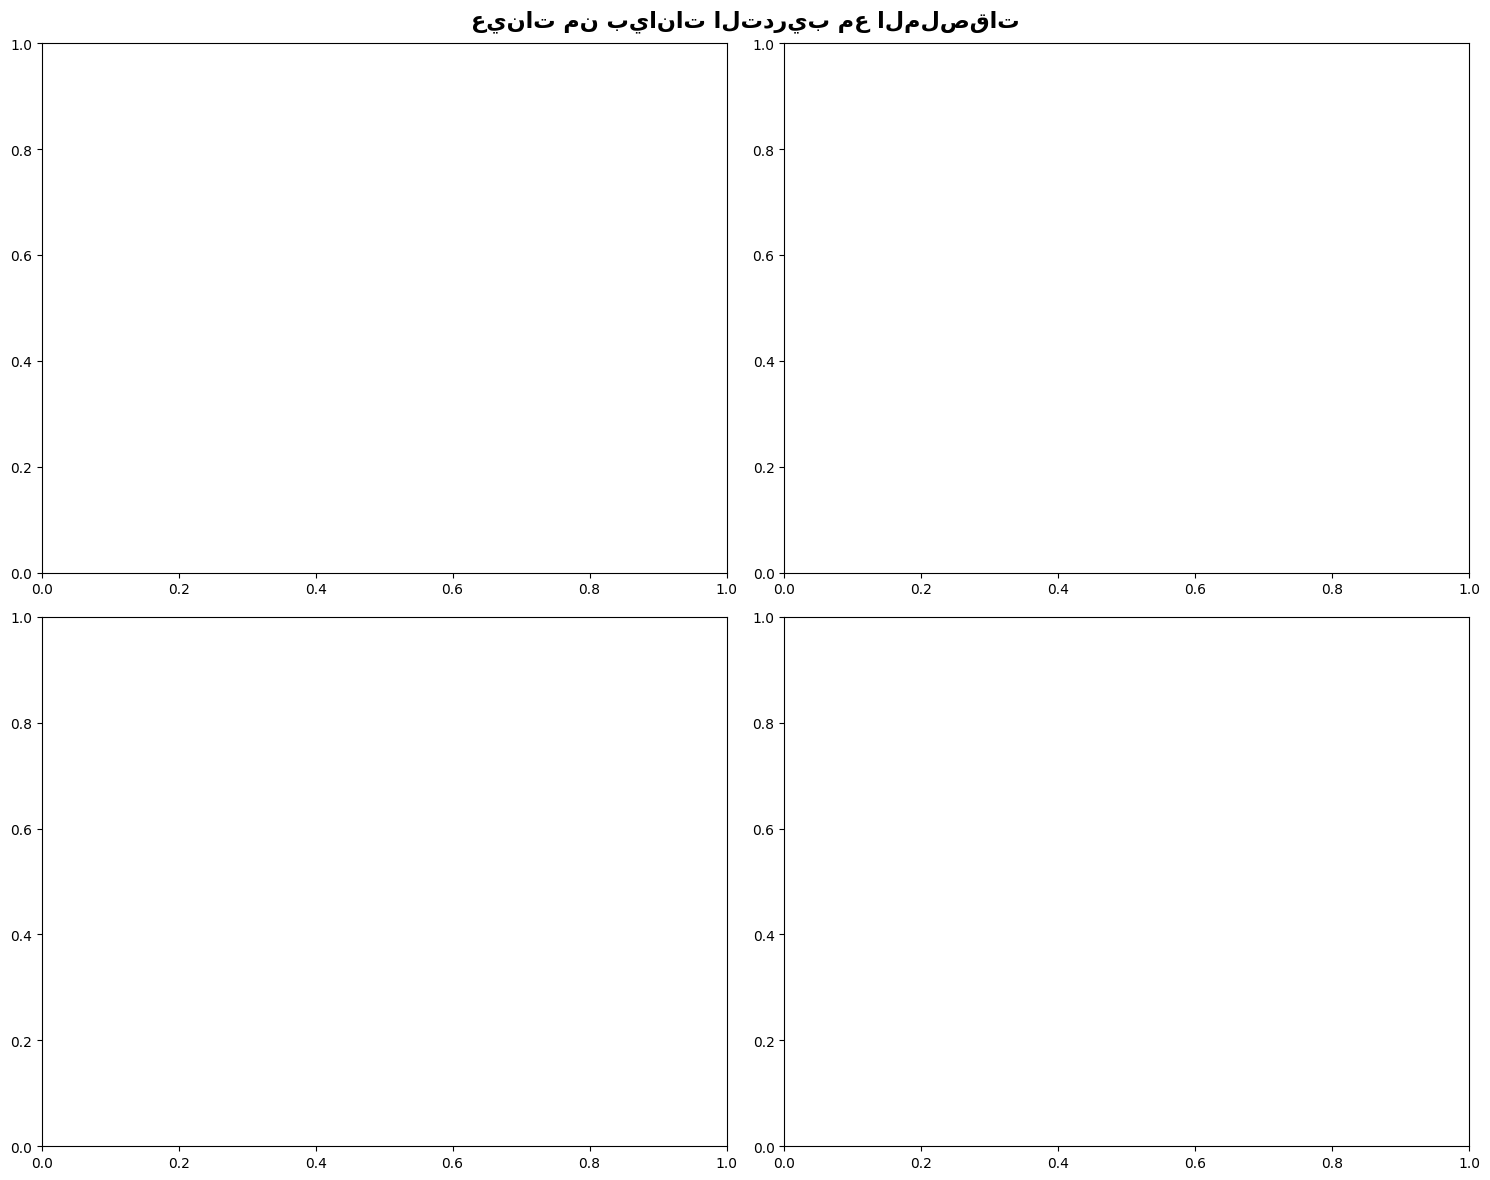

✅ تم حفظ عينات التدريب في: /content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/results/training_samples.png
🔄 جاري تهيئة نموذج YOLOv11...
✅ تم تحميل النموذج: yolo11n.pt

✅ النموذج جاهز للتدريب!

📋 ملخص النموذج:
----------------------------------------
عدد المعلمات الكلي: 2,624,080
عدد المعلمات القابلة للتدريب: 0
نسبة المعلمات القابلة للتدريب: 0.00%
----------------------------------------


In [ ]:
# التحقق من البيانات
if saudi_model.prepare_data():
    # عرض عينات من البيانات
    saudi_model.visualize_sample_data()

    # تهيئة النموذج
    if saudi_model.initialize_model():
        print("\n✅ النموذج جاهز للتدريب!")

        # عرض ملخص النموذج
        print("\n📋 ملخص النموذج:")
        print("-" * 40)

        # عدد المعلمات
        if hasattr(saudi_model.model.model, 'model'):
            total_params = sum(p.numel() for p in saudi_model.model.model.parameters())
            trainable_params = sum(p.numel() for p in saudi_model.model.model.parameters() if p.requires_grad)

            print(f"عدد المعلمات الكلي: {total_params:,}")
            print(f"عدد المعلمات القابلة للتدريب: {trainable_params:,}")
            print(f"نسبة المعلمات القابلة للتدريب: {trainable_params/total_params*100:.2f}%")

        print("-" * 40)
    else:
        print("❌ فشل في تهيئة النموذج")
else:
    print("❌ البيانات غير جاهزة للتدريب")

### 3.8 بدء عملية التدريب

In [ ]:
# بدء التدريب
print("\n" + "="*60)
print("🔥 بدء عملية التدريب...")
print("="*60)

# التدريب (يمكن إيقافه إذا كان سيستغرق وقتاً طويلاً)
train_success = saudi_model.train_model()

if train_success:
    # حفظ تقرير التدريب
    report_path = saudi_model.save_training_report()

    print("\n🎉 تم الانتهاء من التدريب بنجاح!")

    # عرض نتائج التدريب
    try:
        # تحميل أفضل نموذج
        best_model_path = models_path / 'training' / saudi_model.config['name'] / 'weights' / 'best.pt'

        if best_model_path.exists():
            print(f"\n🏆 أفضل نموذج محفوظ في: {best_model_path}")

            # عرض حجم النموذج
            model_size = best_model_path.stat().st_size / 1e6  # MB
            print(f"📦 حجم النموذج: {model_size:.2f} MB")

            # تحميل النموذج لعرض النتائج
            trained_model = YOLO(str(best_model_path))

            # اختبار سريع على صورة عشوائية
            test_image_path = datasets_path / 'images' / 'val'
            test_images = list(test_image_path.glob('*.jpg'))

            if test_images:
                # اختبار على صورة واحدة
                results = trained_model(test_images[0], imgsz=640, conf=0.25)

                # عرض النتائج
                for result in results:
                    result.save(filename=str(results_path / 'test_prediction.jpg'))
                    print(f"✅ تم حفظ نتيجة الاختبار في: {results_path / 'test_prediction.jpg'}")

                    # عرض المقاييس الأساسية
                    if hasattr(result, 'boxes'):
                        boxes = result.boxes
                        if len(boxes) > 0:
                            print(f"\n🔍 تم اكتشاف {len(boxes)} كائن:")
                            for box in boxes:
                                cls_id = int(box.cls[0])
                                conf = float(box.conf[0])
                                class_name = ppe_classes_saudi.get(cls_id, f"Class {cls_id}")
                                print(f"   - {class_name}: {conf:.2%} ثقة")
        else:
            print("⚠️  لم يتم العثور على أفضل نموذج")

    except Exception as e:
        print(f"⚠️  خطأ في تحميل النتائج: {e}")
else:
    print("\n❌ فشل في التدريب، يرجى التحقق من البيانات والإعدادات")


🔥 بدء عملية التدريب...

🚀 بدء تدريب النموذج...
Ultralytics 8.4.10 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=0.05, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/AI_Portfolio/PPE_Detection_System/datasets/ppe_yolo/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=0.5, multi_scale=0.0, name=training, nbs=

### 3.10 حفظ حالة المشروع ورفعها إلى Git

In [ ]:
# حفظ جميع التحديثات
%cd /content/drive/MyDrive/AI_Portfolio/PPE_Detection_System

# إنشاء ملف README للنموذج
model_readme = f"""
# نموذج YOLOv11 لكشف معدات الوقاية الشخصية

## معلومات النموذج
- الإصدار: YOLOv11n
- تاريخ التدريب: {datetime.now().strftime("%Y-%m-%d")}
- عدد الفئات: {len(ppe_classes_saudi)}
- حجم الصورة المدخلة: 640x640

## أداء النموذج
*ملاحظة: سيتم تحديث هذه القيم بعد اكتمال التدريب*

## كيفية الاستخدام

```python
"""
from ultralytics import YOLO

# تحميل النموذج
model = YOLO('models/training/{saudi_model.config['name']}/weights/best.pt')

# التنبؤ
results = model('path/to/image.jpg', conf=0.25)

# عرض النتائج
for result in results:
    result.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-1730891265.py, line 24)